In [5]:
!pip install rtree -q
!pip install geopandas -q

In [1]:
import io
import pandas as pd

In [2]:
data = pd.read_csv('data/enderecos.txt', sep=';')
data.head()

,Bar,Endereço
0,Bar do Coronel,"R. Francisco Rafael, 298, São José Dos Campos"
1,Snooker Music Bar,"Av Andrômeda 3330, São José Dos Campos"
2,Kadu bar e creperia,"R. Inconfidencia, 298, São José Dos Campos"
3,Boemia e Rapsodias,"Av. Rui Barbosa, 1985, São José Dos Campos"


In [3]:
from geopandas.tools import geocode

In [4]:
# Proveedor de Geodocificación Nominatim
geo = geocode(data['Endereço'], provider='nominatim', user_agent="geocoding", timeout=10)

/Users/wpcasas/Lab/pygeo/.venv_pygeo/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
geo

,geometry,address
0,POINT (-45.88340 -23.18181),"Rua Francisco Rafael, Jardim Bela Vista, São J..."
1,POINT (-45.88462 -23.22693),"Avenida Andrômeda, Jardim Satélite, São José d..."
2,POINT (-45.88814 -23.19710),"Rua Inconfidência, Jardim São Dimas, São José ..."
3,POINT (-45.90439 -23.15203),"Avenida Rui Barbosa, Vila Veneziani, Jardim Gu..."


# Concatenación

In [7]:
comb = geo.merge(data, left_index=True, right_index=True)
comb

,geometry,address,Bar,Endereço
0,POINT (-45.88340 -23.18181),"Rua Francisco Rafael, Jardim Bela Vista, São J...",Bar do Coronel,"R. Francisco Rafael, 298, São José Dos Campos"
1,POINT (-45.88462 -23.22693),"Avenida Andrômeda, Jardim Satélite, São José d...",Snooker Music Bar,"Av Andrômeda 3330, São José Dos Campos"
2,POINT (-45.88814 -23.19710),"Rua Inconfidência, Jardim São Dimas, São José ...",Kadu bar e creperia,"R. Inconfidencia, 298, São José Dos Campos"
3,POINT (-45.90439 -23.15203),"Avenida Rui Barbosa, Vila Veneziani, Jardim Gu...",Boemia e Rapsodias,"Av. Rui Barbosa, 1985, São José Dos Campos"


In [8]:
type(comb)

geopandas.geodataframe.GeoDataFrame

In [9]:
comb.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
comb.to_file('output/bares_sjc.shp')

# Operadores espaciales

In [11]:
from shapely.geometry import Point, Polygon

In [12]:
p1 = Point(51.1103009, 17.038199)
p2 = Point(51.106977, 17.016376)

plg = Polygon([(51.114671, 17.022160),(51.108502, 17.022468),(51.104253, 17.041725),(51.112447, 17.044875)])

In [13]:
print(p1)
print(p2)
print(plg)

POINT (51.1103009 17.038199)
POINT (51.106977 17.016376)
POLYGON ((51.114671 17.02216, 51.108502 17.022468, 51.104253 17.041725, 51.112447 17.044875, 51.114671 17.02216))


## Punto dentro de poligono

In [14]:
p1.within(plg)

True

In [15]:
p2.within(plg)

False

## Poligono contiene punto

In [16]:
plg.contains(p1)

True

In [17]:
plg.contains(p2)

False

## Intersección y toque

In [18]:
from shapely.geometry import LineString, MultiLineString

In [19]:
la = LineString([(0,0), (1,1)])
lb = LineString([(1,1), (0,2)])

In [20]:
la.intersects(lb)

True

In [21]:
la.touches(lb)

True

In [22]:
ml = MultiLineString([la, lb])

In [23]:
lb.touches(ml)

False

In [24]:
lb.intersects(ml)

True

se intersectan cuando se cruzan en uno o más punto y se tocan cuando solamente coinciden en un unico punto, como si fuese tangentes

# Concatenación espacial

In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [26]:
sectores = gpd.read_file('data/35SEE250GC_SIR.shp')
sectores.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.0,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.0,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.0,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.0,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.0,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


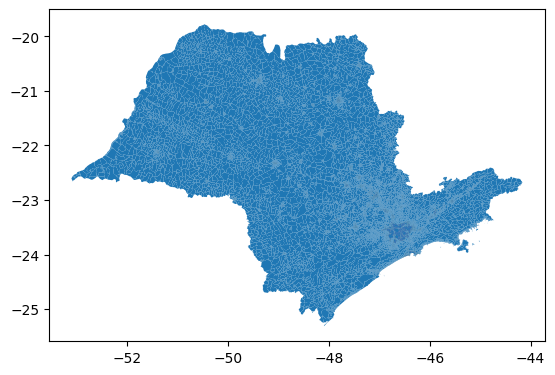

In [27]:
sectores.plot()
plt.show()

In [28]:
print(pd.unique(sectores['NM_MUNICIP']))

['PRAIA GRANDE' 'ARAÇATUBA' 'ATIBAIA' 'ADAMANTINA' 'ADOLFO' 'AGUAÍ'
 'ÁGUAS DA PRATA' 'ÁGUAS DE LINDÓIA' 'ÁGUAS DE SANTA BÁRBARA'
 'ÁGUAS DE SÃO PEDRO' 'AGUDOS' 'ALAMBARI' 'ALFREDO MARCONDES' 'ALTAIR'
 'ALTINÓPOLIS' 'ALTO ALEGRE' 'ALUMÍNIO' 'ÁLVARES FLORENCE'
 'ÁLVARES MACHADO' 'ÁLVARO DE CARVALHO' 'ALVINLÂNDIA' 'AMERICANA'
 'AMÉRICO BRASILIENSE' 'AMÉRICO DE CAMPOS' 'AMPARO' 'ANALÂNDIA'
 'ANDRADINA' 'ANGATUBA' 'ANHEMBI' 'ANHUMAS' 'APARECIDA'
 "APARECIDA D'OESTE" 'APIAÍ' 'ARAÇARIGUAMA' 'ARAÇOIABA DA SERRA' 'ARAMINA'
 'ARANDU' 'ARAPEÍ' 'ARARAQUARA' 'ARARAS' 'ARCO-ÍRIS' 'AREALVA' 'AREIAS'
 'AREIÓPOLIS' 'ARIRANHA' 'ARTUR NOGUEIRA' 'ARUJÁ' 'ASPÁSIA' 'ASSIS'
 'AURIFLAMA' 'AVAÍ' 'AVANHANDAVA' 'AVARÉ' 'BADY BASSITT' 'BALBINOS'
 'BÁLSAMO' 'BANANAL' 'BARÃO DE ANTONINA' 'BARBOSA' 'BARIRI' 'BARRA BONITA'
 'BARRA DO CHAPÉU' 'BARRA DO TURVO' 'BARRETOS' 'BARUERI' 'BAURU'
 'BENTO DE ABREU' 'BERNARDINO DE CAMPOS' 'BIRIGUI' 'BOITUVA' 'BARRINHA'
 'BASTOS' 'BATATAIS' 'BEBEDOURO' 'BERTIOGA' 'BILAC' 'BIRITI

In [29]:
sectores = sectores[sectores['NM_MUNICIP'] == 'SÃO JOSÉ DOS CAMPOS']

# Reset index
sectores = sectores.reset_index()

print(sectores.shape)

sectores.head()

(1074, 16)


,index,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,42083,107665.0,354990405000001,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42084,"POLYGON ((-45.88576 -23.18283, -45.88454 -23.1..."
1,42084,107666.0,354990405000002,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42085,"POLYGON ((-45.88576 -23.18283, -45.88612 -23.1..."
2,42085,107667.0,354990405000003,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42086,"POLYGON ((-45.88488 -23.18101, -45.88371 -23.1..."
3,42086,107668.0,354990405000004,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42087,"POLYGON ((-45.88095 -23.18144, -45.88043 -23.1..."
4,42087,107669.0,354990405000005,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42088,"POLYGON ((-45.88329 -23.18240, -45.88237 -23.1..."


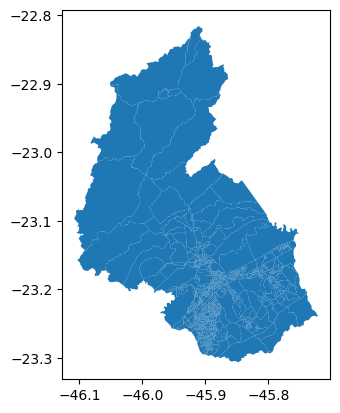

In [30]:
sectores.plot()
plt.show()

In [31]:
sectores.to_file('output/sectores_sjc.shp')

In [32]:
pop10 = pd.read_csv('data/residentes.csv', sep=';')
pop10.head()

,Cod_setor,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,...,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251
0,350010505000001,1,304,249,3,28,24,0,5,0,...,20,1,5,1,0,1,0,0,1,0
1,350010505000002,1,785,550,13,86,136,0,17,0,...,53,0,15,8,0,1,0,0,1,0
2,350010505000003,1,524,432,3,65,24,0,9,0,...,64,0,14,2,0,2,0,1,0,0
3,350010505000004,1,795,613,8,63,111,0,29,0,...,59,0,8,8,0,1,0,0,1,0
4,350010505000005,1,813,744,4,31,33,1,30,0,...,69,0,7,1,1,2,0,0,0,0


In [33]:
pop10.rename(columns={'V001':'pop'}, inplace=True)
pop10.head()

,Cod_setor,Situacao_setor,pop,V002,V003,V004,V005,V006,V007,V008,...,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251
0,350010505000001,1,304,249,3,28,24,0,5,0,...,20,1,5,1,0,1,0,0,1,0
1,350010505000002,1,785,550,13,86,136,0,17,0,...,53,0,15,8,0,1,0,0,1,0
2,350010505000003,1,524,432,3,65,24,0,9,0,...,64,0,14,2,0,2,0,1,0,0
3,350010505000004,1,795,613,8,63,111,0,29,0,...,59,0,8,8,0,1,0,0,1,0
4,350010505000005,1,813,744,4,31,33,1,30,0,...,69,0,7,1,1,2,0,0,0,0


In [34]:
pop10 = pop10[['Cod_setor', 'pop']]
pop10.head()

,Cod_setor,pop
0,350010505000001,304
1,350010505000002,785
2,350010505000003,524
3,350010505000004,795
4,350010505000005,813


In [35]:
print(pop10.shape)
print(pop10.columns)

(47733, 2)
Index(['Cod_setor', 'pop'], dtype='object')


In [36]:
print(type(pop10.Cod_setor[0]))

<class 'numpy.int64'>


In [37]:
print(type(sectores.CD_GEOCODI[0]))

<class 'str'>


In [38]:
sectores['Cod_setor'] = pd.to_numeric(sectores['CD_GEOCODI'])
sectores.head()

,index,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry,Cod_setor
0,42083,107665.0,354990405000001,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42084,"POLYGON ((-45.88576 -23.18283, -45.88454 -23.1...",354990405000001
1,42084,107666.0,354990405000002,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42085,"POLYGON ((-45.88576 -23.18283, -45.88612 -23.1...",354990405000002
2,42085,107667.0,354990405000003,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42086,"POLYGON ((-45.88488 -23.18101, -45.88371 -23.1...",354990405000003
3,42086,107668.0,354990405000004,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42087,"POLYGON ((-45.88095 -23.18144, -45.88043 -23.1...",354990405000004
4,42087,107669.0,354990405000005,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42088,"POLYGON ((-45.88329 -23.18240, -45.88237 -23.1...",354990405000005


In [39]:
set_pop = sectores.merge(pop10, on='Cod_setor', how='left')
set_pop.head()

,index,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry,Cod_setor,pop
0,42083,107665.0,354990405000001,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42084,"POLYGON ((-45.88576 -23.18283, -45.88454 -23.1...",354990405000001,359.0
1,42084,107666.0,354990405000002,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42085,"POLYGON ((-45.88576 -23.18283, -45.88612 -23.1...",354990405000002,319.0
2,42085,107667.0,354990405000003,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42086,"POLYGON ((-45.88488 -23.18101, -45.88371 -23.1...",354990405000003,542.0
3,42086,107668.0,354990405000004,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42087,"POLYGON ((-45.88095 -23.18144, -45.88043 -23.1...",354990405000004,42.0
4,42087,107669.0,354990405000005,URBANO,35499040500,None,354990405,SÃO JOSÉ DOS CAMPOS,3549904,SÃO JOSÉ DOS CAMPOS,SÃO JOSÉ DOS CAMPOS,VALE DO PARAÍBA PAULISTA,354990405005,Setor Socioeconômico 03,42088,"POLYGON ((-45.88329 -23.18240, -45.88237 -23.1...",354990405000005,435.0


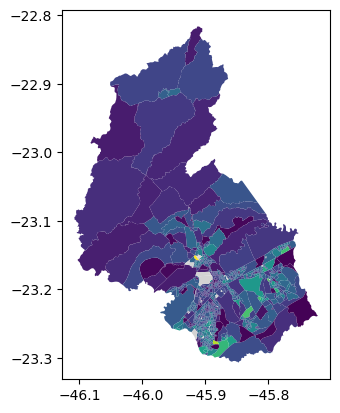

In [40]:
set_pop.plot(column='pop', cmap='viridis', vmin=min(set_pop['pop']), vmax=max(set_pop['pop']), missing_kwds={'color': 'lightgrey'})
plt.show()

In [41]:
set_pop = set_pop[['pop', 'geometry', 'Cod_setor']]
set_pop.head()

,pop,geometry,Cod_setor
0,359.0,"POLYGON ((-45.88576 -23.18283, -45.88454 -23.1...",354990405000001
1,319.0,"POLYGON ((-45.88576 -23.18283, -45.88612 -23.1...",354990405000002
2,542.0,"POLYGON ((-45.88488 -23.18101, -45.88371 -23.1...",354990405000003
3,42.0,"POLYGON ((-45.88095 -23.18144, -45.88043 -23.1...",354990405000004
4,435.0,"POLYGON ((-45.88329 -23.18240, -45.88237 -23.1...",354990405000005


In [42]:
print(sectores.shape)
print(set_pop.shape)

(1074, 17)
(1074, 3)


In [43]:
set_pop.to_file('output/pop_sjc.shp')

In [44]:
bares = gpd.read_file('output/bares_sjc.shp')
bares.head()

,address,Bar,Endereço,geometry
0,"Rua Francisco Rafael, Jardim Bela Vista, São J...",Bar do Coronel,"R. Francisco Rafael, 298, São José Dos Campos",POINT (-45.88340 -23.18181)
1,"Avenida Andrômeda, Jardim Satélite, São José d...",Snooker Music Bar,"Av Andrômeda 3330, São José Dos Campos",POINT (-45.88462 -23.22693)
2,"Rua Inconfidência, Jardim São Dimas, São José ...",Kadu bar e creperia,"R. Inconfidencia, 298, São José Dos Campos",POINT (-45.88814 -23.19710)
3,"Avenida Rui Barbosa, Vila Veneziani, Jardim Gu...",Boemia e Rapsodias,"Av. Rui Barbosa, 1985, São José Dos Campos",POINT (-45.90439 -23.15203)


In [45]:
bares.crs == set_pop.crs

False

In [46]:
print(bares.crs)
print(set_pop.crs)

EPSG:4326
EPSG:4674


In [47]:
bares = bares.to_crs(crs='epsg:4674')
bares.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [48]:
bares.crs == set_pop.crs

True

In [49]:
sjc_join = gpd.sjoin(bares, set_pop, how='inner', predicate='within')
sjc_join.head()

,address,Bar,Endereço,geometry,index_right,pop,Cod_setor
0,"Rua Francisco Rafael, Jardim Bela Vista, São J...",Bar do Coronel,"R. Francisco Rafael, 298, São José Dos Campos",POINT (-45.88340 -23.18181),2,542.0,354990405000003
1,"Avenida Andrômeda, Jardim Satélite, São José d...",Snooker Music Bar,"Av Andrômeda 3330, São José Dos Campos",POINT (-45.88462 -23.22693),316,416.0,354990405000276
2,"Rua Inconfidência, Jardim São Dimas, São José ...",Kadu bar e creperia,"R. Inconfidencia, 298, São José Dos Campos",POINT (-45.88814 -23.19710),82,595.0,354990405000083
3,"Avenida Rui Barbosa, Vila Veneziani, Jardim Gu...",Boemia e Rapsodias,"Av. Rui Barbosa, 1985, São José Dos Campos",POINT (-45.90439 -23.15203),346,1196.0,354990405000306


In [50]:
!pip install contextily -q

In [51]:
import contextily as cx

In [52]:
print(cx.providers.keys())
print(cx.providers.values())

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava', 'OrdnanceSurvey'])
dict_values([{'Mapnik': {'url': 'https://tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', 'attribution': '(C) OpenStreetMap contributors', 'name': 'OpenStreetMap.Mapnik'}, 'DE': {'url': 'https://tile.openstreetmap.de/{z}/{x}/{y}.png', 'max_zoom': 18, 'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', 'att

In [53]:
sjc_join.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [54]:
!pip install mapclassify -q

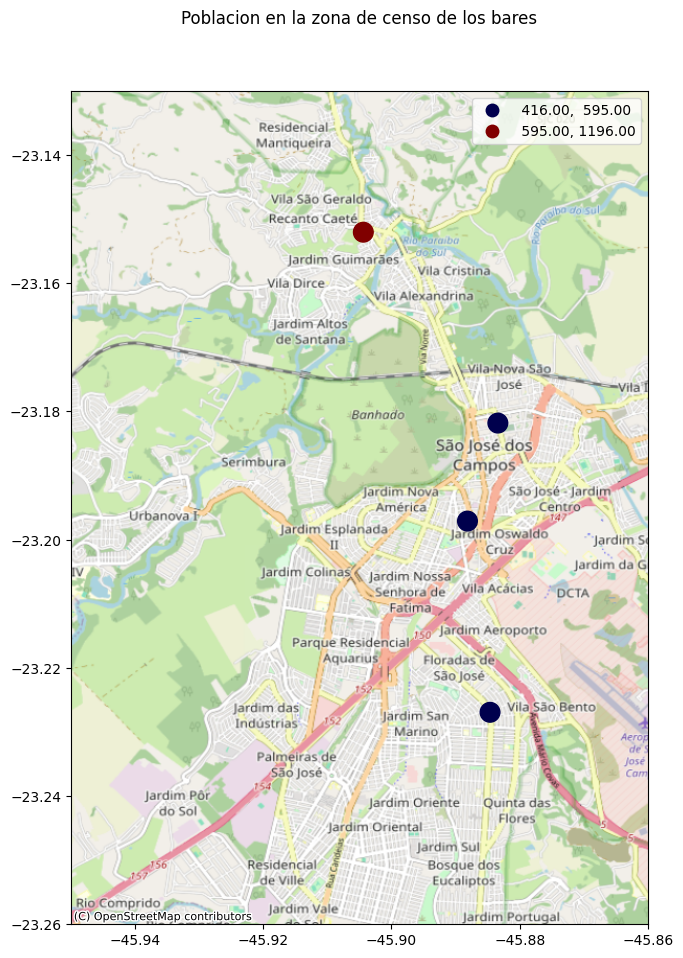

In [55]:
fig, ax = plt.subplots(figsize=(10,10))

sjc_join.plot(ax=ax, column='pop', cmap='seismic', markersize=200, scheme='naturalbreaks', k=2, legend=True)
ax.set_xlim(-45.95, -45.86)
ax.set_ylim(-23.26, -23.13)

fig.suptitle('Poblacion en la zona de censo de los bares')

cx.add_basemap(ax=ax, crs='epsg:4674', zoom=13, source=cx.providers.OpenStreetMap.Mapnik)
fig.tight_layout(pad=3)
plt.show()

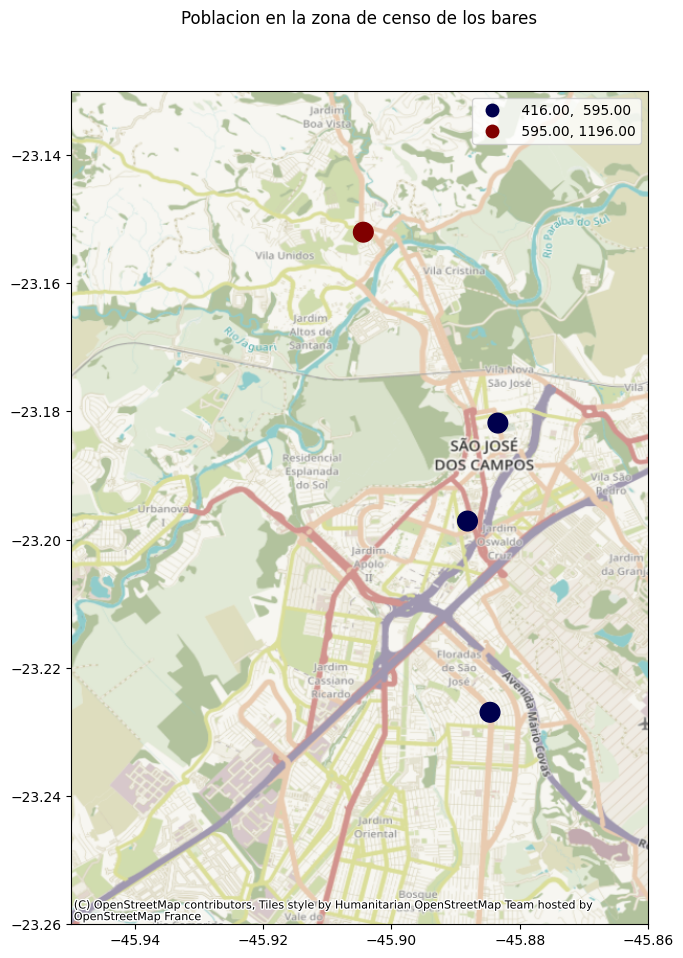

In [56]:
fig, ax = plt.subplots(figsize=(10,10))

sjc_join.plot(ax=ax, column='pop', cmap='seismic', markersize=200, scheme='naturalbreaks', k=2, legend=True)
ax.set_xlim(-45.95, -45.86)
ax.set_ylim(-23.26, -23.13)

fig.suptitle('Poblacion en la zona de censo de los bares')

cx.add_basemap(ax=ax, crs='epsg:4674', zoom=13)
fig.tight_layout(pad=3)
plt.show()

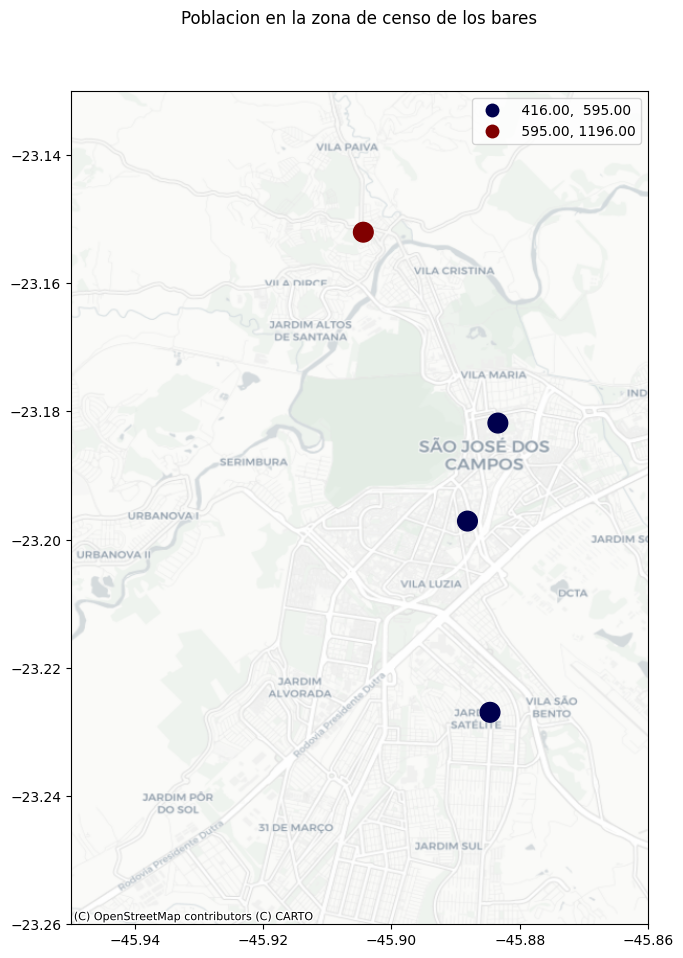

In [59]:
fig, ax = plt.subplots(figsize=(10,10))

sjc_join.plot(ax=ax, column='pop', cmap='seismic', markersize=200, scheme='naturalbreaks', k=2, legend=True)
ax.set_xlim(-45.95, -45.86)
ax.set_ylim(-23.26, -23.13)

fig.suptitle('Poblacion en la zona de censo de los bares')

#cx.add_basemap(ax=ax, crs='epsg:4674', zoom=13, source=cx.providers.Stamen.TonerLite) # Stamen ha sido retirado
cx.add_basemap(ax=ax, crs='epsg:4674', zoom=13, source=cx.providers.CartoDB.Positron)
fig.tight_layout(pad=3)
plt.show()